# Import Packages

In [10]:
import re
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import emoji
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords', quiet=True)

True

In [2]:
df = pd.read_csv("Tweets.csv")
cleaned_df = pd.read_csv("cleaned_tweets.csv")

# Inspect Dataset

In [3]:
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("Missing Values:")
print(df.isnull().sum())

# Basic Descriptive Info
print("Data Info:")
print(df.info())

Shape: (14639, 3)
Columns: ['airline_sentiment', 'sentiment_confidence', 'text']
Missing Values:
airline_sentiment       0
sentiment_confidence    0
text                    0
dtype: int64
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14639 entries, 0 to 14638
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airline_sentiment     14639 non-null  object 
 1   sentiment_confidence  14639 non-null  float64
 2   text                  14639 non-null  object 
dtypes: float64(1), object(2)
memory usage: 343.2+ KB
None


# Tweet Length Distribution

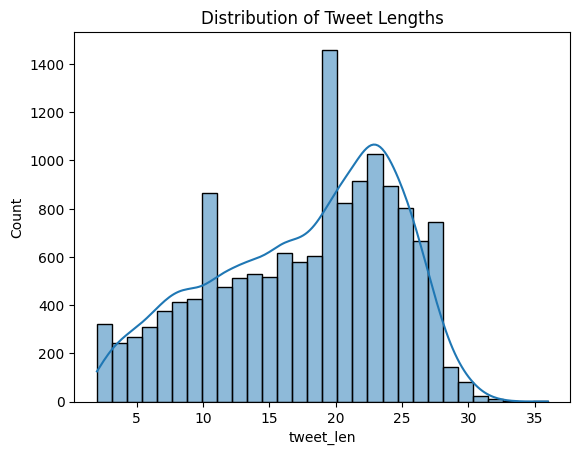

In [4]:
df["tweet_len"] = df["text"].str.split().apply(len)
sns.histplot(df["tweet_len"], bins=30, kde=True)
plt.title("Distribution of Tweet Lengths")
plt.show()

# WordCloud

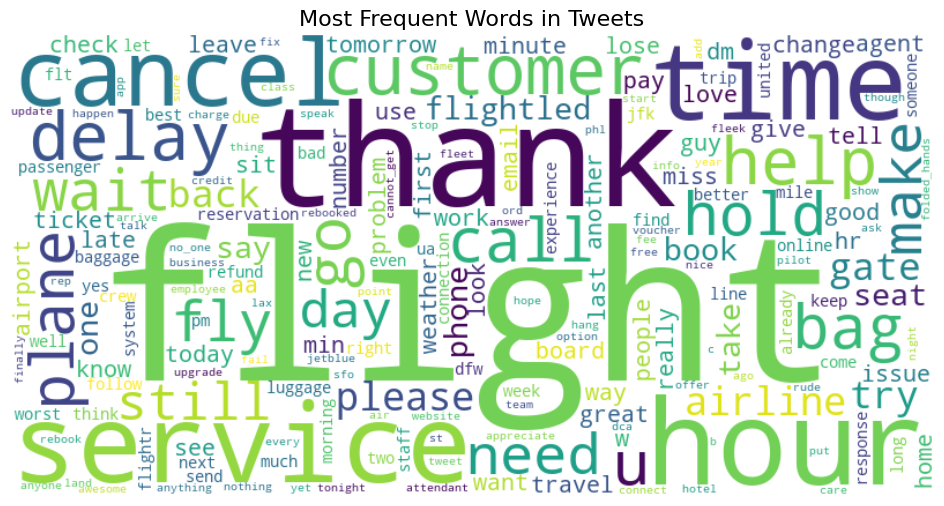

In [5]:
# Combine all tweets into one large text
all_words = ' '.join(cleaned_df['clean_text'].fillna('').astype(str))

# Add more stopwords
stopwords = set(STOPWORDS)
stopwords.update(['rt', 'user', 'amp'])  # common Twitter junk

# Create and display word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords,
                      collocations=False).generate(all_words)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Tweets', fontsize=16)
plt.show()

# Most Common Emojis

In [6]:
def extract_emojis(s):
    """Extract all emojis from text safely across emoji versions."""
    try:
        # emoji.emoji_list() returns [{'emoji': '😍', 'match_start': 24, 'match_end': 25}, ...]
        return [e['emoji'] for e in emoji.emoji_list(str(s))]
    except Exception:
        # fallback regex (for ultra-old versions)
        import re
        emoji_pattern = re.compile(
            "["  
            "\U0001F600-\U0001F64F"  # emoticons
            "\U0001F300-\U0001F5FF"  # symbols & pictographs
            "\U0001F680-\U0001F6FF"  # transport & map symbols
            "\U0001F1E0-\U0001F1FF"  # flags
            "\U00002700-\U000027BF"  # dingbats
            "\U000024C2-\U0001F251"  # enclosed characters
            "]+", flags=re.UNICODE)
        return emoji_pattern.findall(str(s))

# Apply to dataframe
df['emojis'] = df['text'].astype(str).apply(extract_emojis)
emoji_list = [e for es in df['emojis'] for e in es]
emoji_freq = Counter(emoji_list)

if emoji_freq:
    print("\nMost Common Emojis:")
    for emo, freq in emoji_freq.most_common(10):
        print(f"{emo}: {freq}")
else:
    print("\nNo emojis detected in dataset.")


Most Common Emojis:
🙏: 125
😂: 62
✈️: 49
😭: 44
👍: 41
😡: 33
😢: 32
😊: 31
👏: 28
❤️: 23


In [9]:
emoji_counter = pd.DataFrame({
    'emoji': ['🙏', '😂', '✈️', '😭', '👍', '😡', '😢', '😊', '👏', '❤️'],
    'count': [125, 62, 49, 44, 41, 33, 32, 31, 28, 23]
})

# Create compact Plotly chart
fig = px.bar(
    emoji_counter, x='count', y='emoji',
    orientation='h',
    text='count',
    color='count',
    color_continuous_scale='Blues',
    title='Most Common Emojis'
)

# Compact layout tweaks
fig.update_layout(
    yaxis=dict(autorange='reversed', tickfont=dict(size=18)),   # bigger emojis
    xaxis=dict(showgrid=False, showticklabels=False),
    plot_bgcolor='white',
    margin=dict(l=60, r=20, t=40, b=20),
    height=400,  # overall height (reduce for compact look)
    coloraxis_showscale=False,  # hide colorbar
)

fig.update_traces(
    textposition='outside',
    marker_line_width=0,
    textfont_size=14
)

fig.show()